In [1]:
import pandas as pd

schools = pd.read_csv("data/schoools.csv")
schools = schools[schools["LAT."] > 0]

health_facilities = pd.read_csv("data/health_facilites.csv")

telcos = pd.read_csv("data/telcos.csv")

In [2]:
import utm

def convert_utm_to_long_lat(east, north):
    #central part of ghana is in UTM Zone 30
    zone = 30
    longitude, latitude = utm.to_latlon(east, north, zone, 'U')
    return longitude, latitude


In [3]:
from ipyleaflet import Map, Marker, MarkerCluster, Icon, AwesomeIcon, FullScreenControl


school_icon = AwesomeIcon(
    name='university',
    marker_color='lightblue',
    spin=False
)


health_icon = AwesomeIcon(
    name='medkit',
    marker_color='lightgreen',
    spin=False
)


npo_icon = Icon(icon_url='icons/charity.png', 
                  icon_size=[30, 30]
                )


telco_icon = Icon(icon_url='icons/signal-tower.png', 
                  icon_size=[30, 30]
                )

awutu_breku = (5.6984 ,-0.6066)
m = Map(center=awutu_breku, zoom=8)

markers_ = []

def create_markers(data, length, icon):
    for i in length:
        east = int(data.iloc[i]["LONG."].item())
        north = int(data.iloc[i]["LAT."].item())
        
        longitude, latitude = convert_utm_to_long_lat(east, north)
        location = (longitude, latitude)
        
        marker = Marker(location=location, draggable=False, title=data.iloc[i]["NAME"], icon=icon)
        markers_.append(marker)
        
data_points = (
        [schools, range(0, 40, 1), school_icon],
        [health_facilities, range(0, 3, 1), health_icon],
        [telcos, range(0, 3, 1), telco_icon]
    )

for point in data_points:
    create_markers(point[0], point[1], point[2])

    
marker_cluster = MarkerCluster(
    markers=markers_
)

m.add_layer(marker_cluster)
m.add_control(FullScreenControl())
m.layout.height = '1000px'
m.save('distict_data_collection_exercise_map.html', title='Distirct Data Collection Exercise Map')
m

Map(center=[5.6984, -0.6066], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [28]:
convert_utm_to_long_lat(770885.0544081922, 599952.0086377086)

(5.422848630849871, -0.5554867339465073)

In [29]:
import folium
import matplotlib.pyplot as plt

In [30]:
import geopandas

shape_file = "data/Districts 110/Ghana_Districts_2000_110.shp"
data = geopandas.read_file(shape_file)

central_region = data[data["REG_NAME"] == "CENTRAL"]

awutu_ewutu_senya = data[data["DIST_CODE"] == "0206"]
awutu_ewutu_senya = awutu_ewutu_senya.to_crs("EPSG:4326")

awutu_ewutu_senya

,DIST_CODE,DIST_NAME,REG_CODE,REG_NAME,geometry
16,0206,Awutu/Ewutu/Senya,02,CENTRAL,"MULTIPOLYGON (((-0.55549 5.42285, -0.55498 5.4..."


In [31]:
import json
data = json.loads(awutu_ewutu_senya.to_json())

coordinates = data['features'][0]["geometry"]["coordinates"]

coordinates_a = coordinates[1][0]

for point in range(0, len(coordinates_a), 1):
    coordinates_a[point][0], coordinates_a[point][1] = coordinates_a[point][1], coordinates_a[point][0]
    coordinates_a[point] = tuple(coordinates_a[point])
    
    
    
coordinates_b = coordinates[0][0]

for point in range(0, len(coordinates_b), 1):
    coordinates_b[point][0], coordinates_b[point][1] = coordinates_b[point][1], coordinates_b[point][0]
    coordinates_b[point] = tuple(coordinates_b[point])

from ipyleaflet import Map, Polygon

multipolygon_a = Polygon(
    locations=[coordinates_a],
    color="green",
    fill_color="green"
)

multipolygon_b = Polygon(
    locations=[coordinates_b],
    color="green",
    fill_color="green"
)

m = Map(center=(5.6984, -0.6066), zoom=10)
m.add_layer(multipolygon_a);
m.add_layer(multipolygon_b);
m.add_control(FullScreenControl())

m

Map(center=[5.6984, -0.6066], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

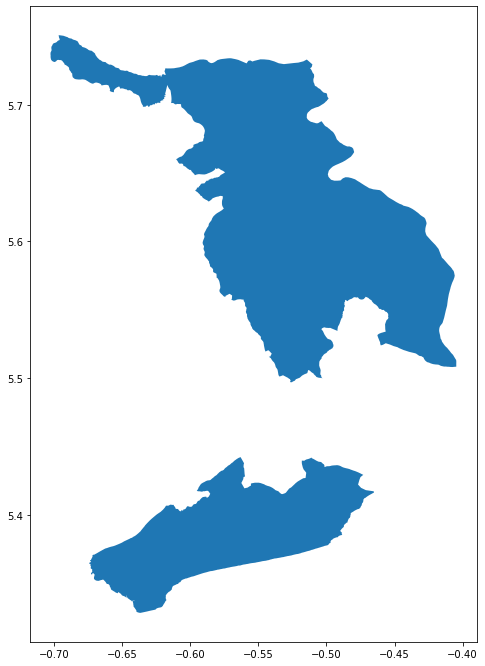

In [32]:
awutu_ewutu_senya.plot(figsize=(8, 15))
plt.show()

In [33]:
m = folium.Map(location=[5.6984, -0.6066], zoom_start=10)

sim_geo = geopandas.GeoSeries(awutu_ewutu_senya['geometry']).simplify(tolerance=0.001)
geo_j = sim_geo.to_json()

geo_j

geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(m)
m

In [34]:
shape_file = "data/Districts/Map_of_Districts_216.shp"
data = geopandas.read_file(shape_file)

central_region = data[data["RGN_NM2012"] == "Central"]
awutu_senya = data[data["ID"] == 209]

awutu_senya

,ID,NAME,LABEL,THEME_NAME,DTT_ID2010,DTT_NM2010,DTT_LB2010,RGN_NM2012,AREA_M2,gdppersqkm,geometry
30,209,Awutu Senya,Awutu Senya,EWUTU SENYA,207,Awutu Senya,Awutu Senya,Central,2.448350e+08,245,"POLYGON ((769997.248 634665.394, 770067.380 63..."


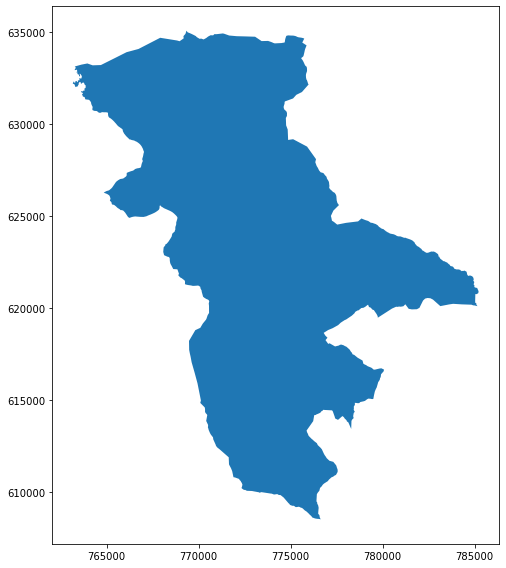

In [35]:
awutu_senya.plot(figsize=(8, 15))
plt.show()

In [36]:
awutu_senya = awutu_senya.to_crs("EPSG:4326")

m = folium.Map(location=[5.6984, -0.6066], zoom_start=10)

sim_geo = geopandas.GeoSeries(awutu_senya['geometry']).simplify(tolerance=0.001)
geo_j = sim_geo.to_json()

geo_j

geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(m)
m

In [37]:
central_region

,ID,NAME,LABEL,THEME_NAME,DTT_ID2010,DTT_NM2010,DTT_LB2010,RGN_NM2012,AREA_M2,gdppersqkm,geometry
22,201,Komenda Edna Eguafo / Abirem,Komenda Edna Eguafo / Abirem,KOMENDA-EDINA-EGYAFO-ABIREM MUNICIPAL,202,Komenda Edina Eguafo,Komenda Edina Eguafo,Central,4.526419e+08,453,"POLYGON ((681548.632 576753.903, 681585.767 57..."
23,202,Cape Coast Metro,Cape Coast Metro,CAPE COAST METROPOLIS,201,Cape Coast,Cape Coast,Central,1.224488e+08,122,"POLYGON ((698224.671 565972.526, 698149.388 56..."
24,203,Abura / Asebu / Kwamankese,Abura / Asebu / Kwamankese,ABURA-ASEBU-KWAMANKESE,210,Abura Asebu Kwaman,Abura Asebu Kwaman,Central,3.769371e+08,377,"POLYGON ((707937.438 598962.645, 707949.145 59..."
25,204,Mfantsiman,Mfantsiman,MFANTSIMAN MUNICIPAL,208,Mfantsiman,Mfantsiman,Central,3.008961e+08,301,"POLYGON ((721217.019 584791.035, 721211.497 58..."
26,205,Ajumako-Enyan-Esiam,Ajumako-Enyan-Esiam,AJUMAKO-ENYAN-ESSIAM,211,Ajumako Enyan Esiam,Ajumako Enyan Esiam,Central,5.216485e+08,522,"POLYGON ((721811.910 609826.913, 722040.193 60..."
27,206,Gomoa West,Gomoa West,GOMOA WEST,215,Gomoa West,Gomoa West,Central,4.590209e+08,459,"POLYGON ((746187.307 610664.881, 746234.968 61..."
28,207,Effutu,Effutu,EFFUTU MUNICIPAL,204,Efutu,Efutu,Central,8.531166e+07,85,"POLYGON ((770519.587 599388.104, 770501.054 59..."
29,208,Gomoa East,Gomoa East,GOMOA EAST,214,Gomoa East,Gomoa East,Central,5.404444e+08,540,"POLYGON ((769517.817 617561.686, 769531.524 61..."
30,209,Awutu Senya,Awutu Senya,EWUTU SENYA,207,Awutu Senya,Awutu Senya,Central,2.448350e+08,245,"POLYGON ((769997.248 634665.394, 770067.380 63..."
31,210,Agona East,Agona East,AGONA EAST,206,Agona West,Agona West,Central,3.277426e+08,328,"POLYGON ((758071.576 634651.597, 758255.712 63..."


In [14]:
gomoa_east = data[data["ID"] == 208]
gomoa_east = awutu_senya.to_crs("EPSG:4326")

m = folium.Map(location=[5.6984, -0.6066], zoom_start=10)

sim_geo = geopandas.GeoSeries(gomoa_east['geometry']).simplify(tolerance=0.001)
geo_j = sim_geo.to_json()

geo_j

geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(m)
m

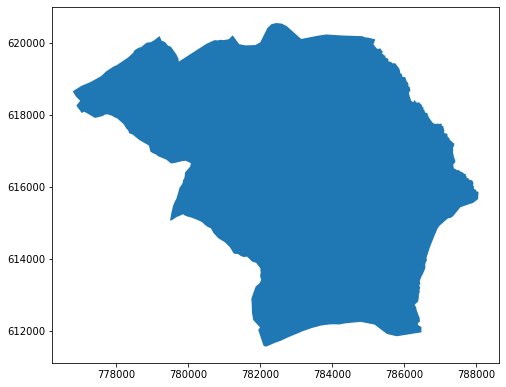

In [38]:
awutu_senya_east = data[data["ID"] == 220]
awutu_senya_east.plot(figsize=(8, 15))
plt.show()

In [39]:
import json
data = json.loads(awutu_senya.to_json())

coordinates = data['features'][0]["geometry"]["coordinates"]

coordinates_a = coordinates[0]

for point in range(0, len(coordinates_a), 1):
    coordinates_a[point][0], coordinates_a[point][1] = coordinates_a[point][1], coordinates_a[point][0]
    coordinates_a[point] = tuple(coordinates_a[point])

from ipyleaflet import Map, Polygon

multipolygon_a = Polygon(
    locations=[coordinates_a],
    color="green",
    fill_color="green"
)

m = Map(center=(5.6984, -0.6066), zoom=10)
m.add_layer(multipolygon_a);
m.add_control(FullScreenControl())

m

Map(center=[5.6984, -0.6066], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

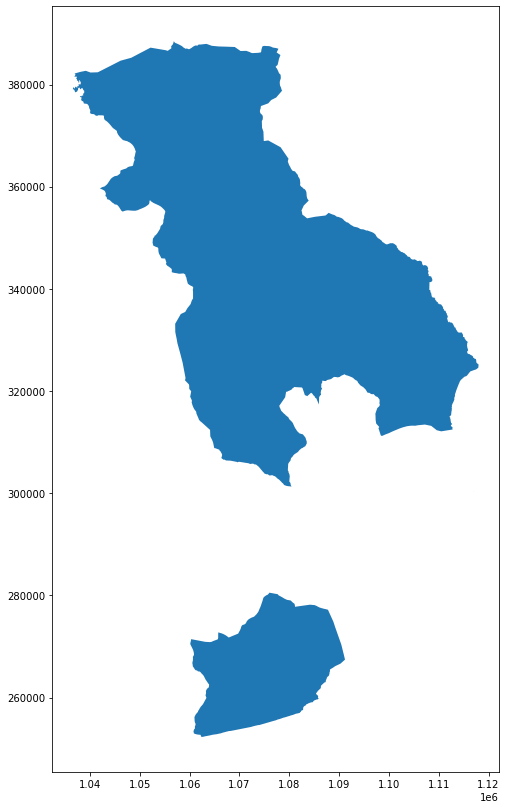

In [17]:
shape_file = "data/Districts 170/Ghana_Districts_170.shp"
data = geopandas.read_file(shape_file)

ewutu_senya = data[data["DIST_CODE"] == "0209"]

ewutu_senya.plot(figsize=(8, 15))
plt.show()

In [40]:
ewutu_senya

,REGION,DISTRICT,ID1,DIST_CODE,AREA,PERIMETER,AREA_KM,geometry
87,CENTRAL,EWUTU SENYA,730,0209,3.793977e+09,473529.11842,352.47184,"MULTIPOLYGON (((1116977.312 300312.476, 111694..."


In [41]:
data[data["REGION"] == "CENTRAL"]

KeyError: 'REGION'

In [42]:
central_region = data[data["REGION"] == "CENTRAL"]

central_region.plot(figsize=(8, 15))
plt.show()

KeyError: 'REGION'

In [43]:
from ipyleaflet import DrawControl

dc = DrawControl()
m.add_control(dc)

m

Map(bottom=127116.0, center=[5.6984, -0.6066], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoo…

In [44]:
ls data/gha_admbnda_gss_20210308_SHP/

gha_admbnda_adm0_gss_20210308.cpg
gha_admbnda_adm0_gss_20210308.dbf
gha_admbnda_adm0_gss_20210308.prj
gha_admbnda_adm0_gss_20210308.sbn
gha_admbnda_adm0_gss_20210308.sbx
gha_admbnda_adm0_gss_20210308.shp
gha_admbnda_adm0_gss_20210308.shp.xml
gha_admbnda_adm0_gss_20210308.shx
gha_admbnda_adm1_gss_20210308.cpg
gha_admbnda_adm1_gss_20210308.dbf
gha_admbnda_adm1_gss_20210308.prj
gha_admbnda_adm1_gss_20210308.sbn
gha_admbnda_adm1_gss_20210308.sbx
gha_admbnda_adm1_gss_20210308.shp
gha_admbnda_adm1_gss_20210308.shp.xml
gha_admbnda_adm1_gss_20210308.shx
gha_admbnda_adm2_gss_20210308.cpg
gha_admbnda_adm2_gss_20210308.dbf
gha_admbnda_adm2_gss_20210308.prj
gha_admbnda_adm2_gss_20210308.sbn
gha_admbnda_adm2_gss_20210308.sbx
gha_admbnda_adm2_gss_20210308.shp
gha_admbnda_adm2_gss_20210308.shp.xml
gha_admbnda_adm2_gss_20210308.shx
gha_admbndl_admALL_gss_itos_20210308.cpg
gha_admbndl_admALL_gss_itos_20210308.dbf
gha_admbndl_admALL_gss_itos_20210308.prj
gha_admbndl_admALL_gss_itos_20210308.sbn
gha_admb

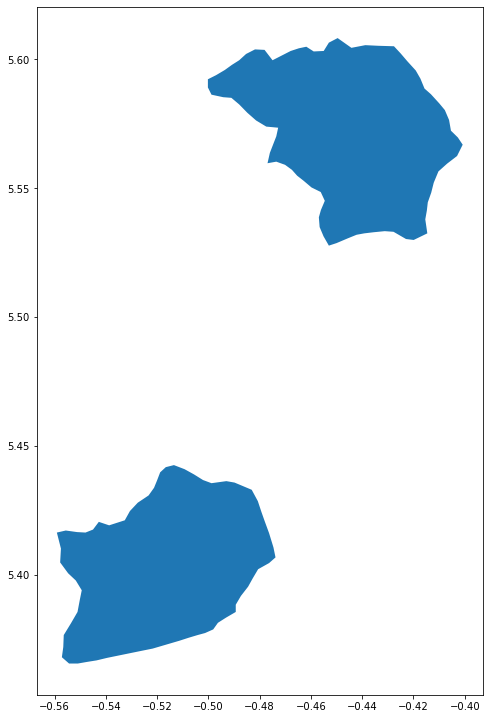

In [45]:
shape_file = "data/gha_admbnda_gss_20210308_SHP/gha_admbnda_adm2_gss_20210308.shp"
data = geopandas.read_file(shape_file)

central_region = data[data["ADM1_EN"] == "Central"]

awutu_senya_east = data[data["ADM2_PCODE"] == "GH0510"]
awutu_senya = data[data["ADM2_PCODE"] == "GH0509"]

awutu_senya_east.plot(figsize=(8, 15))
plt.show()

In [46]:
central_region

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
5,1.206454,0.030763,Abura-Asebu-Kwamankese,GH0501,None,None,None,Central,GH05,Ghana,GH,2018-10-26,2021-03-08,None,"POLYGON ((-1.12378 5.41608, -1.12329 5.41248, ..."
19,0.760285,0.026731,Agona East,GH0502,None,None,None,Central,GH05,Ghana,GH,2018-10-26,2021-03-08,None,"POLYGON ((-0.66840 5.73688, -0.66302 5.73688, ..."
20,0.966486,0.029071,Agona West Municipal,GH0503,None,None,None,Central,GH05,Ghana,GH,2018-10-26,2021-03-08,None,"POLYGON ((-0.75891 5.70850, -0.75909 5.70349, ..."
26,1.163009,0.042569,Ajumako-Enyan-Essiam,GH0504,None,None,None,Central,GH05,Ghana,GH,2018-10-26,2021-03-08,None,"POLYGON ((-1.08008 5.46667, -1.07562 5.46649, ..."
42,1.227706,0.063121,Asikuma-Odoben-Brakwa,GH0505,None,None,None,Central,GH05,Ghana,GH,2018-10-26,2021-03-08,None,"POLYGON ((-0.87842 5.74847, -0.87579 5.74530, ..."
45,0.831952,0.022779,Assin Fosu,GH0506,None,None,None,Central,GH05,Ghana,GH,2018-10-26,2021-03-08,None,"POLYGON ((-1.16571 5.71051, -1.16919 5.70551, ..."
46,1.698386,0.059275,Assin North,GH0507,None,None,None,Central,GH05,Ghana,GH,2018-10-26,2021-03-08,None,"POLYGON ((-1.22479 5.93530, -1.22083 5.93390, ..."
47,1.521507,0.089848,Assin South,GH0508,None,None,None,Central,GH05,Ghana,GH,2018-10-26,2021-03-08,None,"MULTIPOLYGON (((-1.06451 5.45508, -1.06500 5.4..."
60,0.881995,0.019978,Awutu Senya,GH0509,None,None,None,Central,GH05,Ghana,GH,2018-10-26,2021-03-08,None,"POLYGON ((-0.56201 5.73688, -0.55731 5.73749, ..."
61,0.581838,0.008794,Awutu Senya East,GH0510,None,None,None,Central,GH05,Ghana,GH,2018-10-26,2021-03-08,None,"MULTIPOLYGON (((-0.50208 5.43671, -0.49878 5.4..."


In [49]:
ase_json = awutu_senya_east["geometry"].to_json()

import json

ase_dict = json.loads(ase_json)
coordinates_a = ase_dict["features"][0]["geometry"]["coordinates"][0][0]

for point in range(0, len(coordinates_a), 1):
    coordinates_a[point][0], coordinates_a[point][1] = coordinates_a[point][1], coordinates_a[point][0]
    coordinates_a[point] = tuple(coordinates_a[point])
    
as_json = awutu_senya["geometry"].to_json()
as_dict = json.loads(as_json)

coordinates_b = as_dict["features"][0]["geometry"]["coordinates"][0]
for point in range(0, len(coordinates_b), 1):
    coordinates_b[point][0], coordinates_b[point][1] = coordinates_b[point][1], coordinates_b[point][0]
    coordinates_b[point] = tuple(coordinates_b[point])


from ipyleaflet import Map, Polygon

multipolygon_a = Polygon(
    locations=[coordinates_a, coordinates_b],
    color="green",
    fill_color="green",
    fill_opacity = 0.1
)

m = Map(center=(5.6984, -0.6066), zoom=11)
m.add_layer(multipolygon_a);
m.add_control(FullScreenControl())

m.layout.height = '1000px'
m.save("Awutu Senya West District Map.html", title="Awutu Senya West District Map")
m

Map(center=[5.6984, -0.6066], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [26]:
m = folium.Map(location=[5.6984, -0.6066], zoom_start=10)

sim_geo = geopandas.GeoSeries(awutu_senya_east['geometry']).simplify(tolerance=0.001)
geo_j = sim_geo.to_json()

geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(m)
m

In [27]:
m = folium.Map(location=[5.6984, -0.6066], zoom_start=10)

sim_geo = geopandas.GeoSeries(awutu_senya['geometry']).simplify(tolerance=0.001)
geo_j = sim_geo.to_json()

geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(m)
m